# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from scipy.stats import probplot, chi2_contingency, chi2
from yellowbrick.model_selection import FeatureImportances
from sklearn.inspection import permutation_importance

import scipy.stats as stats
import joblib
import os
%matplotlib inline

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Data

In [6]:
df = data.copy()

In [7]:
x = df.drop(['Bankrupt?'],axis=1)
y = df['Bankrupt?']

# Split train and test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,
                                              y,
                                              test_size=0.1,
                                              stratify = y,
                                              random_state = 42,
                                              )

In [9]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4887,0.470141,0.525894,0.519460,0.595865,0.595994,0.998961,0.797356,0.809286,0.303484,0.781547,...,0.791207,0.011975,0.623554,0.595861,0.839659,0.279658,0.026245,0.559778,1,0.029683
1462,0.617413,0.663650,0.649660,0.613932,0.611338,0.999100,0.798676,0.810280,0.305499,0.782612,...,0.852714,0.002913,0.625007,0.613930,0.843495,0.276838,0.026799,0.565195,1,0.055117
1705,0.537220,0.564326,0.580599,0.616880,0.616880,0.999237,0.797683,0.809562,0.303476,0.781832,...,0.811929,0.004051,0.623595,0.616878,0.841095,0.277578,0.026893,0.565602,1,0.043651
2422,0.468191,0.536633,0.519996,0.609586,0.609586,0.999105,0.797460,0.809376,0.303363,0.781650,...,0.798493,0.020706,0.617830,0.609587,0.840434,0.290328,0.027219,0.566611,1,0.016418
4407,0.527568,0.587167,0.570855,0.613046,0.613046,0.999077,0.797767,0.809592,0.303958,0.781878,...,0.828320,0.001768,0.624091,0.613042,0.842234,0.277833,0.026791,0.565158,1,0.040947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,0.481597,0.528129,0.530007,0.605933,0.605954,0.999021,0.797349,0.809262,0.303343,0.781612,...,0.791904,0.001990,0.623473,0.605932,0.839643,0.282249,0.025451,0.588994,1,0.023023
6687,0.622288,0.707697,0.689330,0.614293,0.603353,0.998882,0.799178,0.811001,0.306831,0.783383,...,0.875503,0.002238,0.624557,0.614294,0.844092,0.275407,0.026794,0.565172,1,0.143685
2623,0.586847,0.642172,0.623374,0.609774,0.609759,0.999064,0.797540,0.809426,0.303589,0.781686,...,0.856548,0.000987,0.623850,0.609770,0.843796,0.277000,0.026791,0.565159,1,0.051988
665,0.500951,0.566616,0.550244,0.608952,0.608837,0.999027,0.797460,0.809367,0.303527,0.781623,...,0.811462,0.002435,0.623780,0.608950,0.841359,0.280314,0.027077,0.566231,1,0.027417


In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6137, 95) (682, 95) (6137,) (682,)


# Fix skewness

In [11]:
def skewness(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_df

In [12]:
skew_df = skewness(X_train)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,ROA(C) before interest and depreciation befor...,-0.236264,0.236264,False
1,ROA(A) before interest and % after tax,-0.979708,0.979708,True
2,ROA(B) before interest and depreciation after...,-0.648705,0.648705,True
3,Operating Gross Margin,-11.608534,11.608534,True
4,Realized Sales Gross Margin,-11.645122,11.645122,True
...,...,...,...,...
90,Liability to Equity,26.656952,26.656952,True
91,Degree of Financial Leverage (DFL),43.904828,43.904828,True
92,Interest Coverage Ratio (Interest expense to ...,-13.729706,13.729706,True
93,Net Income Flag,0.000000,0.000000,False


In [13]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    X_train[column] = np.log1p(X_train[column])

In [14]:
X_train.head(3)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4887,0.470141,0.422580,0.418355,0.467416,0.467497,0.692627,0.586317,0.592932,0.265041,0.577482,...,0.582890,0.011904,0.484617,0.467413,0.609580,0.246593,0.025907,0.444544,1,0.029251
1462,0.617413,0.509014,0.500569,0.478674,0.477065,0.692697,0.587051,0.593481,0.266585,0.578080,...,0.616651,0.002909,0.485512,0.478672,0.611663,0.244387,0.026446,0.448011,1,0.053651
1705,0.537220,0.447455,0.457804,0.480498,0.480498,0.692766,0.586499,0.593085,0.265035,0.577642,...,0.594392,0.004043,0.484643,0.480497,0.610361,0.244966,0.026538,0.448270,1,0.042725


In [15]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    X_test[column] = np.log1p(X_test[column])

In [16]:
X_test.head(3)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4278,0.405450,0.365159,0.366658,0.466833,0.466892,0.692582,0.586233,0.592843,0.264986,0.577394,...,0.549980,0.002914,0.484764,0.466831,0.606841,0.247252,0.026385,0.447812,1,0.026509
129,0.506508,0.447142,0.441481,0.477422,0.477422,0.692700,0.586412,0.593003,0.265038,0.577561,...,0.594995,0.001059,0.484844,0.477422,0.610397,0.244934,0.026606,0.448438,1,0.043178
6524,0.489251,0.443580,0.430507,0.489510,0.489510,0.692669,0.586431,0.593028,0.265184,0.577548,...,0.593564,0.001022,0.484811,0.489508,0.610248,0.244121,0.026451,0.448026,1,0.061568


# Normalize the data

In [17]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [18]:
X_train.head(3)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4887,-0.579224,-0.470211,-0.530967,-0.662242,-0.654474,0.015527,0.014870,0.016298,-0.008507,0.014950,...,-0.389568,-0.051088,-0.021868,-0.662369,-0.033772,-0.051109,-0.098901,-0.365021,0.0,-0.392919
1462,1.866814,1.540628,1.514893,0.341642,0.199513,0.023049,0.091714,0.070241,0.187379,0.077812,...,1.079481,-0.058493,0.081893,0.341638,0.172960,-0.261841,-0.055214,-0.004998,0.0,0.200638
1705,0.534893,0.108488,0.450688,0.504352,0.505978,0.030459,0.033905,0.031262,-0.009236,0.031810,...,0.110926,-0.057559,-0.018948,0.504377,0.043664,-0.206502,-0.047776,0.021992,0.0,-0.065155


In [19]:
X_test.head(3)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4278,-1.653667,-1.806087,-1.817440,-0.714204,-0.708499,0.010581,0.006105,0.007532,-0.015445,0.005708,...,-1.821576,-0.058489,-0.004815,-0.714278,-0.305582,0.011845,-0.060132,-0.025639,0.0,-0.459617
129,0.024796,0.101190,0.044505,0.230080,0.231444,0.023311,0.024811,0.023268,-0.008837,0.023289,...,0.137170,-0.060016,0.004437,0.230104,0.047294,-0.209526,-0.042253,0.039356,0.0,-0.054128
6524,-0.261830,0.018323,-0.228571,1.307963,1.310356,0.019981,0.026857,0.025749,0.009694,0.021848,...,0.074873,-0.060046,0.000594,1.307882,0.032474,-0.287243,-0.054808,-0.003405,0.0,0.393208


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Reensambling data for imbalance dataset

In [21]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(X_train,y_train):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_sm, y_val_sm = y_train.iloc[train_index], y_train.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [1150 1152 1168 ... 6134 6135 6136] Test: [   0    1    2 ... 1234 1235 1236]
Train: [   0    1    2 ... 6134 6135 6136] Test: [1150 1152 1168 ... 2453 2474 2490]
Train: [   0    1    2 ... 6134 6135 6136] Test: [2454 2455 2456 ... 3687 3688 3689]
Train: [   0    1    2 ... 6134 6135 6136] Test: [3550 3555 3562 ... 4909 4910 4911]
Train: [   0    1    2 ... 4909 4910 4911] Test: [4754 4908 4912 ... 6134 6135 6136]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96782077 0.03217923]
[0.96740016 0.03259984]


In [22]:
# Function to get the feature importance of the classifier, and plot it
def feat_importance_plot(model_trn,x,y,df = None):
    
    # change xtick font size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    # top 10 most predictive features
    top_10_feat = FeatureImportances(model_trn, relative=False, topn=10,feature_names=df.columns)
    # top 10 least predictive features
    bottom_10_feat = FeatureImportances(model_trn, relative=False, topn=-10,feature_names=df.columns)
    #change the figure size
    plt.figure(figsize=(10, 4))
    #change x label font size
    plt.xlabel('xlabel', fontsize=14)
    
    
    # Fit to get the feature importances
    top_10_feat.fit(x, y)
    # show the plot
    top_10_feat.show()
    print('\n')
    plt.figure(figsize=(10, 4))
    plt.xlabel('xlabel', fontsize=14)
    # Fit to get the feature importances
    bottom_10_feat.fit(x, y)
    # show the plot
    bottom_10_feat.show()
    print('\n')
    

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
def plot_roc_curve(y_true, y_score, title=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

# Logistic Regression

## Train model

In [25]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [26]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 10.1 MB/s eta 0:00:00


In [27]:
from skopt import BayesSearchCV

In [28]:
# List to append the score and then find the average

accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = BayesSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

---------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression (SMOTE) results:

accuracy: 0.8861507128309573
precision: 0.19198186588616145
recall: 0.7850806451612903
f1: 0.30792990056236835

---------------------------------------------------------------------------------------------------------------------------------------


In [29]:
best_est_reg.get_params()

{'C': 100.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Evaluate model

In [30]:
class_names = ['Stable company', 'Unstable company']

In [31]:
pred_reg_sm = best_est_reg.predict(X_val_sm)

### Feature importance

/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


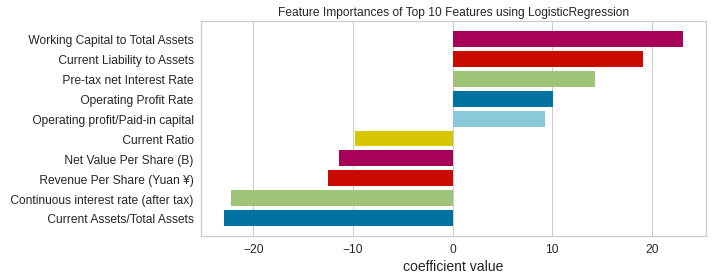

/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


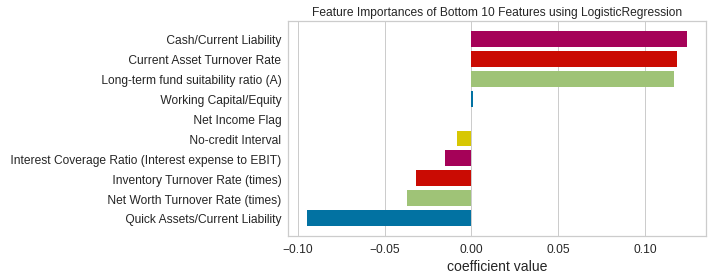

In [32]:
feat_importance_plot(best_est_reg,X_train,y_train,df)

In [33]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
 import scikitplot as skplt


### ROC

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


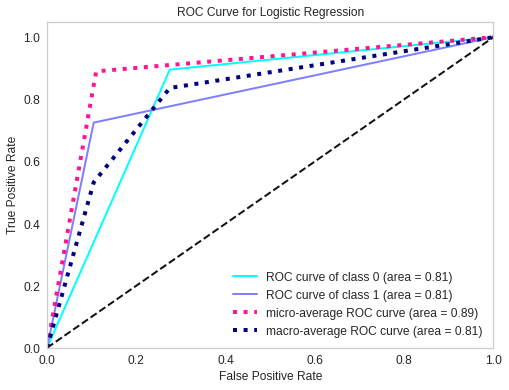

In [35]:
# convert predicted probabilities to a 2D array
pred_prob = np.column_stack((1 - pred_reg_sm, pred_reg_sm))

# plot ROC curve for both classes and micro/macro averages
skplt.metrics.plot_roc_curve(y_val_sm, pred_prob, curves=('each_class', 'micro', 'macro'),
                             title='ROC Curve for {0}'.format("Logistic Regression"),
                             cmap='cool', figsize=(8, 6), text_fontsize='large')
plt.grid(False)
plt.show()

### Confusion matrix

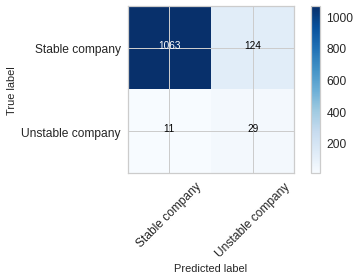

In [36]:
plot_confusion_matrix(y_val_sm, pred_reg_sm,class_names)

### Report

In [37]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']

print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.90      0.94      1187
Fin.Unstable       0.19      0.72      0.30        40

    accuracy                           0.89      1227
   macro avg       0.59      0.81      0.62      1227
weighted avg       0.96      0.89      0.92      1227



In [38]:
test_pred_lr = best_est_reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

## Train Model

In [40]:
# List to append the score and then find the average

accuracy_knn = []
precision_knn = []
recall_knn = []
f1_knn = []
auc_knn = []

knn = KNeighborsClassifier()
#knn_params = {}
knn_params = {"leaf_size": list(range(1,50)),
                  'n_neighbors': list(range(1,30)),
                  'p': [1,2]
                  }

rand_knn = BayesSearchCV(KNeighborsClassifier(), knn_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_knn = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_knn) # SMOTE happens during Cross Validation not before..
    model_knn = pipeline_knn.fit(X_train_sm[train], y_train_sm[train])
    best_est_knn = rand_knn.best_estimator_
    prediction_knn = best_est_knn.predict(X_train_sm[val])
    
    accuracy_knn.append(pipeline_knn.score(X_train_sm[val], y_train_sm[val]))
    precision_knn.append(precision_score(y_train_sm[val], prediction_knn))
    recall_knn.append(recall_score(y_train_sm[val], prediction_knn))
    f1_knn.append(f1_score(y_train_sm[val], prediction_knn))
    auc_knn.append(roc_auc_score(y_train_sm[val], prediction_knn))


print('---' * 45)
print('')
print('KNN (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_knn)))
print("precision: {}".format(np.mean(precision_knn)))
print("recall: {}".format(np.mean(recall_knn)))
print("f1: {}".format(np.mean(f1_knn)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

KNN (SMOTE) results:

accuracy: 0.8920570264765784
precision: 0.18543269573279703
recall: 0.6778225806451613
f1: 0.2893258078900339

---------------------------------------------------------------------------------------------------------------------------------------


In [41]:
params = best_est_knn.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 40,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 1,
 'weights': 'uniform'}

## Evaluate the model

In [42]:
pred_knn = best_est_knn.predict(X_val_sm)

### ROC

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


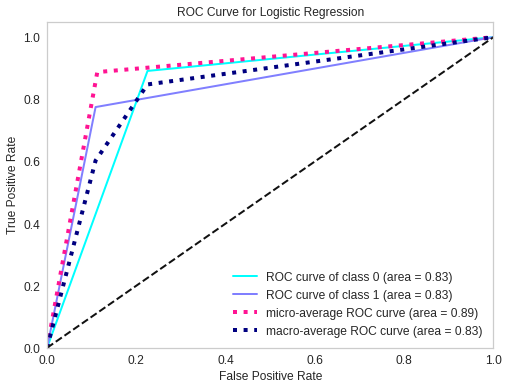

In [43]:
pred_prob_knn = np.column_stack((1 - pred_knn, pred_knn))

# plot ROC curve for both classes and micro/macro averages
skplt.metrics.plot_roc_curve(y_val_sm, pred_prob_knn, curves=('each_class', 'micro', 'macro'),
                             title='ROC Curve for {0}'.format("Logistic Regression"),
                             cmap='cool', figsize=(8, 6), text_fontsize='large')
plt.grid(False)
plt.show()

### Confusion Matrix

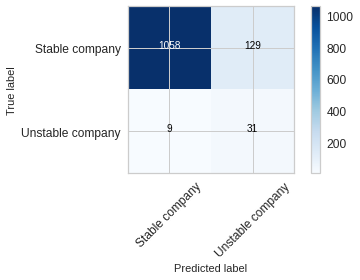

In [44]:
plot_confusion_matrix(y_val_sm, pred_knn,class_names)

### Report

In [45]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']
pred_knn_sm = best_est_knn.predict(X_val_sm)
print(classification_report(y_val_sm, pred_knn_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.89      0.94      1187
Fin.Unstable       0.19      0.78      0.31        40

    accuracy                           0.89      1227
   macro avg       0.59      0.83      0.62      1227
weighted avg       0.97      0.89      0.92      1227



In [46]:
test_pred_knn = best_est_knn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# LightBoosting

In [47]:
import lightgbm as lgb

In [48]:
clf = lgb.LGBMClassifier()

## Train model

In [49]:
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [50]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [51]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [52]:
n_HP_points_to_test = 4

In [53]:
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=100)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=4,
    
    
    random_state=314
    )

In [54]:
#gs.fit(X_train, y_train, **fit_params)
#print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [55]:
# List to append the score and then find the average

accuracy_clfc = []
precision_clfc = []
recall_clfc = []
f1_clfc = []
auc_clfc = []




for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_clfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), gs) # SMOTE happens during Cross Validation not before..
    model_clfc = pipeline_clfc.fit(X_train_sm[train], y_train_sm[train])
    best_est_clfc = gs.best_estimator_
    prediction_clfc = best_est_clfc.predict(X_train_sm[val])
    
    accuracy_clfc.append(pipeline_clfc.score(X_train_sm[val], y_train_sm[val]))
    precision_clfc.append(precision_score(y_train_sm[val], prediction_clfc))
    recall_clfc.append(recall_score(y_train_sm[val], prediction_clfc))
    f1_clfc.append(f1_score(y_train_sm[val], prediction_clfc))
    auc_clfc.append(roc_auc_score(y_train_sm[val], prediction_clfc))


print('---' * 45)
print('')
print('clfc (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_clfc)))
print("precision: {}".format(np.mean(precision_clfc)))
print("recall: {}".format(np.mean(recall_clfc)))
print("f1: {}".format(np.mean(f1_clfc)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

clfc (SMOTE) results:

accuracy: 0.9364562118126273
precision: 0.28644774602091677
recall: 0.6397177419354839
f1: 0.39437529357910095

---------------------------------------------------------------------------------------------------------------------------------------


In [56]:
best_est_clfc.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9731668400523877,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 171,
 'min_child_weight': 1e-05,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': 4,
 'num_leaves': 41,
 'objective': None,
 'random_state': 314,
 'reg_alpha': 10,
 'reg_lambda': 100,
 'silent': True,
 'subsample': 0.5575732396028996,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'None'}

## Evaluate model

In [57]:
pred_clf = best_est_clfc.predict(X_val_sm)

### Feature importance

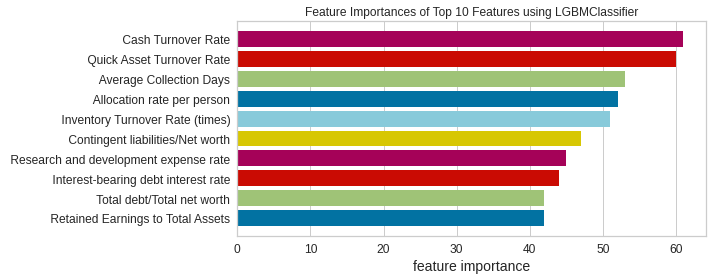

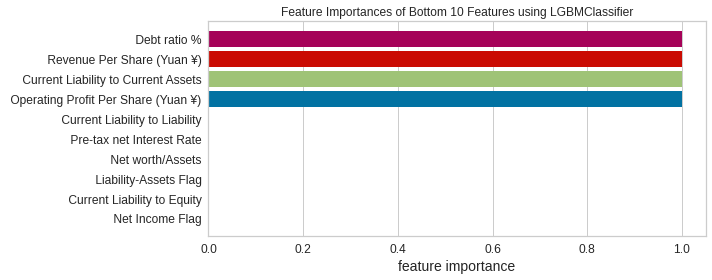

In [58]:
feat_importance_plot(best_est_clfc,X_train,y_train,df)

### Roc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


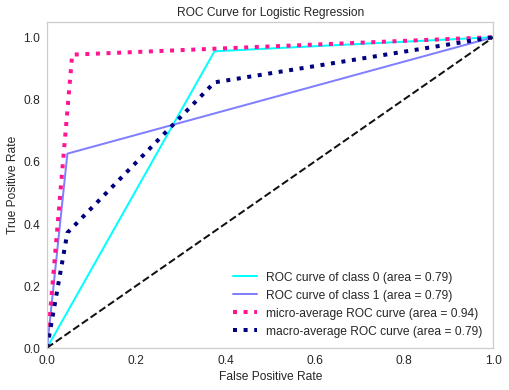

In [59]:
# convert predicted probabilities to a 2D array
pred_clfc = np.column_stack((1 - pred_clf, pred_clf))

# plot ROC curve for both classes and micro/macro averages
skplt.metrics.plot_roc_curve(y_val_sm, pred_clfc, curves=('each_class', 'micro', 'macro'),
                             title='ROC Curve for {0}'.format("Logistic Regression"),
                             cmap='cool', figsize=(8, 6), text_fontsize='large')
plt.grid(False)
plt.show()

### Confusion matrix

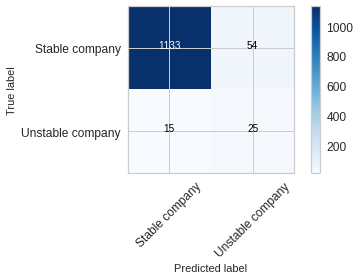

In [60]:
plot_confusion_matrix(y_val_sm, pred_clf,class_names)

### Report

In [61]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']

print(classification_report(y_val_sm, pred_clf, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.95      0.97      1187
Fin.Unstable       0.32      0.62      0.42        40

    accuracy                           0.94      1227
   macro avg       0.65      0.79      0.70      1227
weighted avg       0.97      0.94      0.95      1227



# Ensamble

In [64]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
classifiers = {
    'sgd':SGDClassifier(random_state=42,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'bagging':BaggingClassifier(random_state=42),
    'neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=42),
    'extra_trees':ExtraTreesClassifier(random_state=42),
    }

In [75]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [76]:
voting = VotingClassifier(estimators=[
          ('sgd',SGDClassifier(random_state=42,loss='perceptron')),
            ('logistic_regression',LogisticRegression(random_state=42,max_iter=1000)),
            ('support_vector_machine',SVC(random_state=42,probability=True)),
            ('decision_tree',DecisionTreeClassifier(random_state=42)),
            ('random_forest',RandomForestClassifier(random_state=42)),
            ('gaussian_naive_bayes',GaussianNB()),
            ('k_nearest_neighbors',KNeighborsClassifier()),
            ('gradient_boosting',GradientBoostingClassifier(random_state=42)),
            ('linear_discriminant_analysis',LinearDiscriminantAnalysis()),
            ('bagging',BaggingClassifier(random_state=42)),
            ('neural_network',MLPClassifier(random_state=42,max_iter=1000)),
            ('adaboost',AdaBoostClassifier(random_state=42)),
            ('extra_trees',ExtraTreesClassifier(random_state=42)) ],
           voting='hard')

In [80]:
classifiers=  [SGDClassifier(random_state=42,loss='perceptron'),LogisticRegression(random_state=42,max_iter=1000),SVC(random_state=42,probability=True),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GaussianNB(),KNeighborsClassifier(),GradientBoostingClassifier(random_state=42),LinearDiscriminantAnalysis(),BaggingClassifier(random_state=42),MLPClassifier(random_state=42,max_iter=1000),AdaBoostClassifier(random_state=42),ExtraTreesClassifier(random_state=42),voting]

In [89]:
from sklearn.model_selection import cross_val_score

In [107]:
voting = VotingClassifier(estimators=[('Logistic',best_est_reg),
            ('KNN',best_est_knn),
            ('CLF',best_est_clfc),
            ('gradient_boosting',GradientBoostingClassifier(random_state=42)),
            ('bagging',BaggingClassifier(random_state=42)),
            ('random_forest',RandomForestClassifier(random_state=42)),
            ('neural_network',MLPClassifier(random_state=42,max_iter=1000)),
            ('adaboost',AdaBoostClassifier(random_state=42))],
            voting='hard')

In [108]:
accuracy_voting = []
precision_voting = []
recall_voting = []
f1_voting = []
auc_voting = []




for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_voting = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), voting) # SMOTE happens during Cross Validation not before..
    model_voting = pipeline_voting.fit(X_train_sm[train], y_train_sm[train])
    
    prediction_voting = pipeline_voting.predict(X_train_sm[val])
    
    accuracy_voting.append(pipeline_voting.score(X_train_sm[val], y_train_sm[val]))
    precision_voting.append(precision_score(y_train_sm[val], prediction_voting))
    recall_voting.append(recall_score(y_train_sm[val], prediction_voting))
    f1_voting.append(f1_score(y_train_sm[val], prediction_voting))
    auc_voting.append(roc_auc_score(y_train_sm[val], prediction_voting))


print('---' * 45)
print('')
print('clfc (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_clfc)))
print("precision: {}".format(np.mean(precision_clfc)))
print("recall: {}".format(np.mean(recall_clfc)))
print("f1: {}".format(np.mean(f1_clfc)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

clfc (SMOTE) results:

accuracy: 0.9364562118126273
precision: 0.28644774602091677
recall: 0.6397177419354839
f1: 0.39437529357910095

---------------------------------------------------------------------------------------------------------------------------------------


In [109]:
pred = pipeline_voting.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warni

# Testing

In [62]:
test_pred_lr = best_est_reg.predict(X_test)
test_pred_knn = best_est_knn.predict(X_test)
test_pred_clf = best_est_clfc.predict(X_test) 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [123]:
y_val_sm.shape

(1227,)

In [124]:
pred_voting = pipeline_voting.predict(X_val_sm)

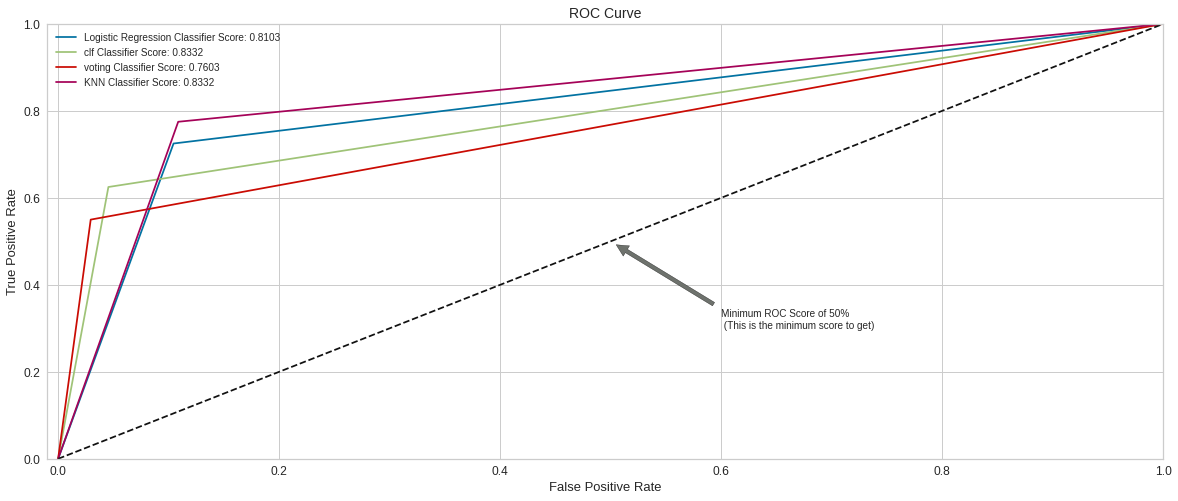

In [126]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_val_sm, pred_reg_sm)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_val_sm, pred_knn)
clf_fpr, clf_tpr, clf_thresold = roc_curve(y_val_sm, pred_clf)
voting_fpr, voting_tpr, voting_thresold = roc_curve(y_val_sm, pred_voting)


def graph_roc_curve_multiple(log_fpr, log_tpr, knn_fpr, knn_tpr,clf_fpr, clf_tpr,voting_fpr, voting_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot(clf_fpr, clf_tpr, label='clf Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_knn)))
    plt.plot(voting_fpr, voting_tpr, label='voting Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_voting)))
    plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_knn)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knn_fpr, knn_tpr,clf_fpr, clf_tpr,voting_fpr, voting_tpr)
plt.show()

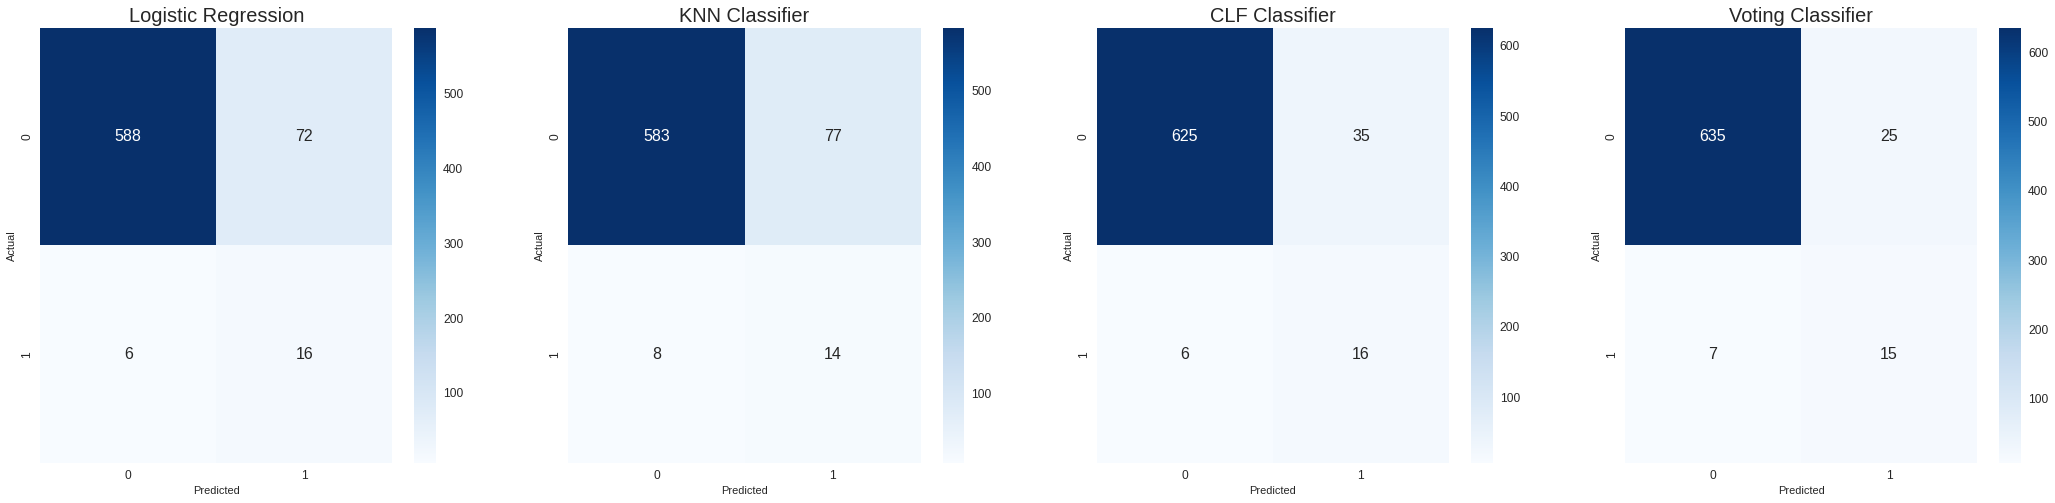

In [110]:
# Plotting confusion matrix for each classifier

conf_mx0 = confusion_matrix(y_test,test_pred_lr)
conf_mx1 = confusion_matrix(y_test,test_pred_knn)
conf_mx2 = confusion_matrix(y_test,test_pred_clf)
conf_mx3 = confusion_matrix(y_test,pred)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(conf_mx3, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

f, ax = plt.subplots(1, 4, figsize=(15,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('KNN Classifier', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('CLF Classifier', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[3])
ax[3].set_title('Voting Classifier', fontsize = 20)

plt.show()

In [111]:
print(classification_report(y_test, test_pred_lr, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.89      0.94       660
Fin.Unstable       0.18      0.73      0.29        22

    accuracy                           0.89       682
   macro avg       0.59      0.81      0.61       682
weighted avg       0.96      0.89      0.92       682



In [112]:
print(classification_report(y_test, test_pred_knn, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.88      0.93       660
Fin.Unstable       0.15      0.64      0.25        22

    accuracy                           0.88       682
   macro avg       0.57      0.76      0.59       682
weighted avg       0.96      0.88      0.91       682



In [113]:
print(classification_report(y_test, test_pred_clf, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.95      0.97       660
Fin.Unstable       0.31      0.73      0.44        22

    accuracy                           0.94       682
   macro avg       0.65      0.84      0.70       682
weighted avg       0.97      0.94      0.95       682



In [114]:
print(classification_report(y_test, pred, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.96      0.98       660
Fin.Unstable       0.38      0.68      0.48        22

    accuracy                           0.95       682
   macro avg       0.68      0.82      0.73       682
weighted avg       0.97      0.95      0.96       682



In [120]:
n_correct = sum(pred == y_test)

In [121]:
print(n_correct/len(test_pred_clf))

0.9530791788856305
